# Notebook 1
## Exploração de Dados 2018/2019 
### Nelson Costa 42983
### Armando Sousa 76498

## Index
- [Task A - Pre Processing](#Task-A---Pre-Processing)
 - [Checking missing values](#Checking-if-datasets-have-missing-values)
 - [Handling categorical data](#Handling-categorical-data)
 - [Encoding class labels](#Encoding-class-labels)
 - [Partitioning datasets](#Partitioning-datasets-in-training-and-test-sets)
 - [Rank features](#Rank-features)
   - [Univariate Feature Selection](#1.-Univariate-Feature-Selection)
     - [1. Mutual Info Classif](#1.-Mutual-Info-Classif)
     - [2. Chi-squared](#2.-Chi-squared)
 - [Dimension reduction](#Dimension-reduction)
   - [Principal Component Analysis - Banknotes](#PCA---Banknotes-dataset)
   - [Kernel PCA - Banknotes](#KPCA---Banknotes-dataset)
   - [Principal Component Analysis - Nursery](#PCA---Nursery-dataset)
   - [Kernel PCA - Nursery](#KPCA---Nursery-dataset)
- [Task B - Predictive Model](#Task-B---Predictive-Model)
 - [Multilayer Perceptron - Banknotes dataset](#MLP---Banknotes-dataset)
 - [Support Vector Machine - Banknotes dataset](#SVM---Banknotes-dataset)
 - [Multilayer Perceptron - Nursery dataset](#MLP---Nursery-dataset)
 - [Support Vector Machine - Nursery dataset](#SVM---Nursery-dataset)
- [Task C - Evaluation](#Task-C---Evaluation)

 


In [1]:
import pandas as pd
import numpy as np
import xlrd
import copy
%matplotlib inline

In [2]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reading datasets

### Banknotes dataset

In [3]:
df_bankNotes = pd.read_excel('./data_banknote_authentication.xlsx')
#df_bankNotes

### Nursery dataset

In [4]:
df_nursery = pd.read_excel('./nursery.xlsx')
#df_nursery

# Task A - Pre Processing

## Checking if datasets have missing values

### Banknotes dataset

In [5]:
df_bankNotes.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

### Nursery dataset

In [6]:
df_nursery.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

## Handling categorical data

### Mapping ordinal features

#### Nursery dataset

In [7]:
# print features before mapping
#df_nursery[df_nursery.columns[0:8]]

In [8]:
# get dataset copy
df_nursery_copy = df_nursery.copy()

# cast data to string
df_nursery_copy = df_nursery_copy.astype(str)

# map features
parents_mapping = {'usual':1, 'pretentious':2, 'great_pret':3}
df_nursery_copy['parents'] = df_nursery_copy['parents'].map(parents_mapping)

has_nurs_mapping = {'proper':1, 'less_proper':2, 'improper':3, 'critical':4, 'very_crit':5}
df_nursery_copy['has_nurs'] = df_nursery_copy['has_nurs'].map(has_nurs_mapping)

form_mapping = {'complete':1, 'completed':2, 'incomplete':3, 'foster':4}
df_nursery_copy['form'] = df_nursery_copy['form'].map(form_mapping)

children_mapping = {'1':1, '2':2, '3':3, 'more':4}
df_nursery_copy['children'] = df_nursery_copy['children'].map(children_mapping)

housing_mapping = {'convenient':1, 'less_conv':2, 'critical':3}
df_nursery_copy['housing'] = df_nursery_copy['housing'].map(housing_mapping)

finance_mapping = {'convenient':1, 'inconv':2}
df_nursery_copy['finance'] = df_nursery_copy['finance'].map(finance_mapping)

social_mapping = {'nonprob':1, 'slightly_prob':2, 'problematic':3}
df_nursery_copy['social'] = df_nursery_copy['social'].map(social_mapping)

health_mapping = {'recommended':1, 'priority':2, 'not_recom':3}
df_nursery_copy['health'] = df_nursery_copy['health'].map(health_mapping)

In [9]:
# print features after mapping
df_nursery_copy[df_nursery_copy.columns[0:8]]

,parents,has_nurs,form,children,housing,finance,social,health
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,3
3,1,1,1,1,1,1,2,1
4,1,1,1,1,1,1,2,2
5,1,1,1,1,1,1,2,3
6,1,1,1,1,1,1,3,1
7,1,1,1,1,1,1,3,2
8,1,1,1,1,1,1,3,3
9,1,1,1,1,1,2,1,1


## Encoding class labels

### Nursery dataset

In [10]:
# print labels before encoding
#df_nursery_copy[df_nursery_copy.columns[8]]

In [11]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df_nursery_copy[df_nursery_copy.columns[8]]))}

class_mapping

{'not_recom': 0,
 'priority': 1,
 'recommend': 2,
 'spec_prior': 3,
 'very_recom': 4}

In [12]:
# map labels
df_nursery_copy[df_nursery_copy.columns[8]] = df_nursery_copy[df_nursery_copy.columns[8]].map(class_mapping)

In [13]:
# print labels after encoding
df_nursery_copy[df_nursery_copy.columns[8]]

0        2
1        1
2        0
3        2
4        1
5        0
6        1
7        1
8        0
9        4
10       1
11       0
12       4
13       1
14       0
15       1
16       1
17       0
18       4
19       1
20       0
21       4
22       1
23       0
24       1
25       1
26       0
27       4
28       1
29       0
        ..
12930    3
12931    3
12932    0
12933    3
12934    3
12935    0
12936    3
12937    3
12938    0
12939    3
12940    3
12941    0
12942    3
12943    3
12944    0
12945    3
12946    3
12947    0
12948    3
12949    3
12950    0
12951    3
12952    3
12953    0
12954    3
12955    3
12956    0
12957    3
12958    3
12959    0
Name: class, Length: 12960, dtype: int64

## Partitioning datasets in training and test sets

In [14]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

### Banknotes dataset

In [15]:
# labels reading
y1=df_bankNotes[df_bankNotes.columns[4]]
# features reading
X1=df_bankNotes[df_bankNotes.columns[0:4]]

# get training and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.3)

### Nursery dataset

In [16]:
# labels reading
y2=df_nursery_copy[df_nursery_copy.columns[8]]
# features reading
X2=df_nursery_copy[df_nursery_copy.columns[0:8]]

# get training and test sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size = 0.3)

## Rank features

### Univariate Feature Selection

Univariate feature selection selects the best features by running univariate statistical tests like **chi-squared test, F-1 test, and mutual information** methods.
Can't use the **chi-squared** function, if there are negative values.
#### 1. Mutual Info Classif

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

test = SelectKBest(score_func = mutual_info_classif, k=2)
test

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7feb971110d0>)

##### Banknotes dataset

In [18]:
test.fit(X_train1, y_train1)
num_features = len(X_train1.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train1.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.3802258458342933, 'variance of Wavelet Transformed image'), (0.23801517730404642, 'skewness of Wavelet Transformed image'), (0.1256880127468687, 'curtosis of Wavelet Transformed image'), (0.02096189349496136, 'entropy of image')]


##### Nursery dataset

In [19]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(0.6677920169002225, 'health'), (0.1527029968114324, 'has_nurs'), (0.04726074573928907, 'parents'), (0.015917829542351214, 'social'), (0.013097459981648463, 'housing'), (0.007990074550721982, 'children'), (0.004061141490929732, 'form'), (0.001149355485609238, 'finance')]


#### 2. Chi-squared

In [20]:
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=2)

##### Nursery dataset

In [21]:
test.fit(X_train2, y_train2)
num_features = len(X_train2.columns)

scores = []
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X_train2.columns[i]))
        
print (sorted(scores, reverse = True))

[(2325.013101208351, 'health'), (1427.2802516749066, 'has_nurs'), (276.9815235078486, 'parents'), (81.68958325989192, 'housing'), (73.70866071080547, 'children'), (58.2113460828719, 'social'), (27.849975378823594, 'form'), (8.539089373462813, 'finance')]


## Dimension reduction
### PCA - Banknotes dataset

Explained variance ratio: [0.76282816 0.14139075 0.06623163 0.02954946]


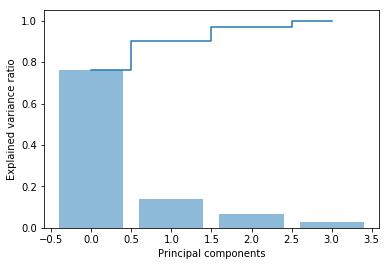

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_train1)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [23]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.1408555  -0.81110082  0.54961467  0.1421228 ]
 [-0.8012564   0.26064385  0.29569897 -0.45012785]
 [ 0.43074972  0.45485319  0.77941563  0.00863336]
 [ 0.39064381 -0.25940088 -0.05474582 -0.88153927]]
singular_ values
 [220.51337932  94.93625208  64.97620155  43.40065913]


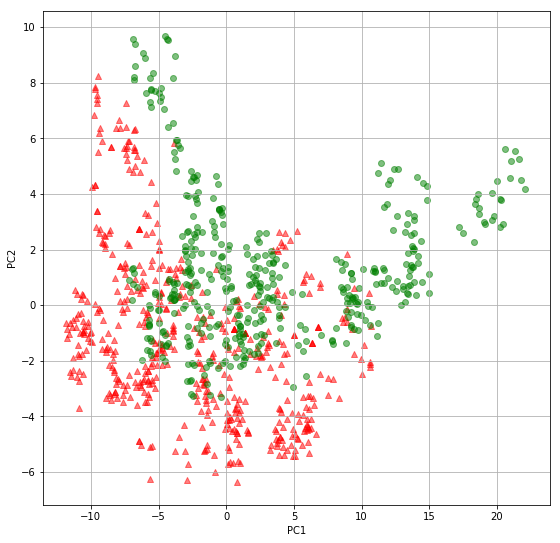

In [24]:
pca = PCA(n_components=2)
X_train_pca1 = pca.fit_transform(X_train1)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1) 

ax.scatter(X_train_pca1[y_train1 == 0, 0], X_train_pca1[y_train1 == 0, 1],
              color='red', marker='^', alpha=0.5)
ax.scatter(X_train_pca1[y_train1 == 1, 0], X_train_pca1[y_train1 == 1, 1],
              color='green', marker='o', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# plt.savefig('./figures/half_moon_2.png', dpi=300)
ax.grid()
plt.show()

X_train1_v1 = pd.DataFrame(data=X_train_pca1)

### KPCA - Banknotes dataset

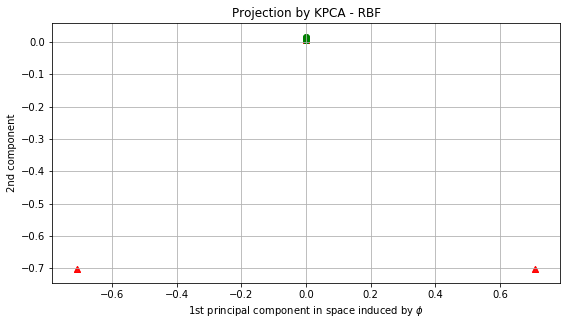

                0         1
0   -7.484313e-09  0.004873
1   -7.354686e-09  0.004788
2   -7.713972e-09  0.005024
3   -7.370927e-09  0.004799
4   -9.137651e-09  0.005958
5   -7.481217e-09  0.004871
6   -2.203414e-08  0.014523
7   -7.544655e-09  0.004913
8   -7.695120e-09  0.005012
9   -7.432398e-09  0.004839
10  -7.342915e-09  0.004781
11  -7.680481e-09  0.005002
12  -7.595515e-09  0.004947
13  -7.346168e-09  0.004783
14  -9.250557e-09  0.006034
15  -1.018801e-08  0.006654
16  -7.376656e-09  0.004803
17  -7.339613e-09  0.004779
18  -9.031830e-09  0.005890
19  -7.800588e-09  0.005081
20  -9.168303e-09  0.005978
21  -9.279876e-09  0.006055
22  -1.101131e-08  0.007191
23  -8.018271e-09  0.005224
24  -9.723090e-09  0.006344
25  -1.320235e-08  0.008640
26  -7.428020e-09  0.004837
27  -7.403236e-09  0.004820
28  -7.958312e-09  0.005185
29  -1.148500e-08  0.007505
..            ...       ...
930 -7.874459e-09  0.005129
931 -7.339596e-09  0.004779
932 -7.407670e-09  0.004823
933 -9.222299e-09  0

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
X_train_kpca1 = kpca.fit_transform(X_train1)
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca1[y_train1 == 0, 0], X_train_kpca1[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca1[y_train1 == 1, 0], X_train_kpca1[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.title("Projection by KPCA - RBF")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()

X_train1_v2 = pd.DataFrame(data=X_train_kpca1)
print(X_train1_v2)

In [26]:
'''
from sklearn.decomposition import KernelPCA

kpca_rbf = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)
kpca_poly = KernelPCA( n_components = 2, kernel="poly", fit_inverse_transform=True, gamma=10)
#kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

X_t1_kpca_rbf = kpca_rbf.fit_transform(X_train1)
X_t1_kpca_poly = kpca_rbf.fit_transform(X_train1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_t1_kpca_rbf[y_train1 == 0, 0], X_t1_kpca_rbf[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
ax[0].scatter(X_t1_kpca_rbf[y_train1 == 1, 0], X_t1_kpca_rbf[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
ax[0].title("Projection by KPCA - Cosine")
ax[0].xlabel("1st principal component in space induced by $\phi$")
ax[0].ylabel("2nd component")
ax[0].grid()

ax[1].scatter(X_t1_kpca_poly[y_train1 == 0, 0], X_t1_kpca_poly[y_train1 == 0, 1], c="red",
            marker='^', alpha=0.5)
ax[1].scatter(X_t1_kpca_poly[y_train1 == 1, 0], X_t1_kpca_poly[y_train1 == 1, 1], c="green",
            marker='o', alpha=0.5)
ax[1].title("Projection by KPCA - Poly")
ax[1].xlabel("1st principal component in space induced by $\phi$")
ax[1].ylabel("2nd component")
ax[1].grid()

plt.show()

X_train1_v2 = pd.DataFrame(data=X_t1_kpca_rbf)
print(X_train1_v2)
'''

'\nfrom sklearn.decomposition import KernelPCA\n\nkpca_rbf = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)\nkpca_poly = KernelPCA( n_components = 2, kernel="poly", fit_inverse_transform=True, gamma=10)\n#kpca = KernelPCA( n_components = 2, kernel="rbf", fit_inverse_transform=True, gamma=10)\n\nfig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))\n\nX_t1_kpca_rbf = kpca_rbf.fit_transform(X_train1)\nX_t1_kpca_poly = kpca_rbf.fit_transform(X_train1)\n\nfig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))\n\nax[0].scatter(X_t1_kpca_rbf[y_train1 == 0, 0], X_t1_kpca_rbf[y_train1 == 0, 1], c="red",\n            marker=\'^\', alpha=0.5)\nax[0].scatter(X_t1_kpca_rbf[y_train1 == 1, 0], X_t1_kpca_rbf[y_train1 == 1, 1], c="green",\n            marker=\'o\', alpha=0.5)\nax[0].title("Projection by KPCA - Cosine")\nax[0].xlabel("1st principal component in space induced by $\\phi$")\nax[0].ylabel("2nd component")\nax[0].grid()\n\nax[1].scatter(X_t1_kpca_poly[

### PCA - Nursery dataset

Explained variance ratio: [0.26935019 0.17005613 0.16746639 0.09117545 0.09023008 0.08964783
 0.08841249 0.03366144]


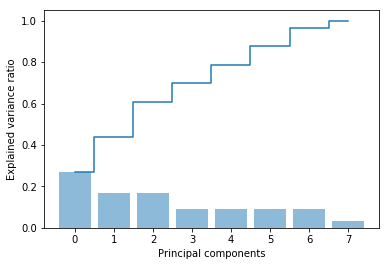

In [27]:
pca = PCA()
principalComponents = pca.fit_transform(X_train2)

print("Explained variance ratio:",pca.explained_variance_ratio_)
range_value = pca.explained_variance_ratio_.shape[0]

plt.bar(range(range_value), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(range_value), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [28]:
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[ 6.21467621e-03  9.99903560e-01 -3.25244456e-03  5.54024700e-03
   9.17911427e-03 -1.14309374e-03 -4.73555910e-03  2.23326003e-03]
 [ 1.70498520e-02 -3.72972110e-03  4.29852501e-01  9.02716994e-01
   3.41810259e-03 -2.14366924e-03  2.82016465e-03 -1.21843043e-04]
 [ 1.72723806e-03  5.27800170e-03  9.02735272e-01 -4.29813298e-01
  -1.47567438e-03  4.21482910e-03 -1.41848451e-02 -8.80708148e-03]
 [ 7.22107502e-01 -1.29296015e-03 -9.72078581e-03 -9.28040356e-03
  -9.70917425e-02 -4.41132549e-03  1.70571678e-01 -6.63202458e-01]
 [ 2.83173281e-01 -1.98172989e-03  1.01304524e-02 -1.37712530e-02
   3.24375107e-01 -1.20422697e-04  7.76050742e-01  4.60480960e-01]
 [ 2.28238260e-01 -1.14921919e-02 -7.27128879e-03 -2.75391341e-03
   8.64022034e-01  4.88817597e-03 -4.48453304e-01  6.81429632e-03]
 [-5.88152040e-01  3.48147425e-03  5.17340490e-03  5.90384210e-03
   3.72397873e-01  5.00002013e-03  4.09032376e-01 -5.89907431e-01]
 [-5.08126201e-03 -1.14562116e-03  2.91925091e-03 -3.69

In [29]:
# Only two components for illustration
pca = PCA(n_components=7)
X_train_pca2 = pca.fit_transform(X_train2)

X_train2_v1 = pd.DataFrame(data=X_train_pca2)

### KPCA - Nursery dataset

In [30]:
#from sklearn.decomposition import KernelPCA

#kpca = KernelPCA(n_components = 7 ,kernel="rbf", fit_inverse_transform=True, gamma=10)
#X_train_kpca2 = kpca.fit_transform(X_train2)

'''
fig= plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1, aspect='equal')

plt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",
            marker='^', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",
            marker='o', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",
            marker='x', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",
            marker='s', alpha=0.5)
plt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",
            marker='*', alpha=0.5)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.grid()
plt.show()
'''
#X_train2_v2 = pd.DataFrame(data=X_train_kpca2)

'\nfig= plt.figure(figsize=(20, 20))\n\nplt.subplot(2, 2, 1, aspect=\'equal\')\n\nplt.scatter(X_train_kpca2[y_train2 == 0, 0], X_train_kpca2[y_train2 == 0, 1], c="red",\n            marker=\'^\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 1, 0], X_train_kpca2[y_train2 == 1, 1], c="green",\n            marker=\'o\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 2, 0], X_train_kpca2[y_train2 == 2, 1], c="cyan",\n            marker=\'x\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 3, 0], X_train_kpca2[y_train2 == 3, 1], c="blue",\n            marker=\'s\', alpha=0.5)\nplt.scatter(X_train_kpca2[y_train2 == 4, 0], X_train_kpca2[y_train2 == 4, 1], c="yellow",\n            marker=\'*\', alpha=0.5)\nplt.title("Projection by KPCA")\nplt.xlabel("1st principal component in space induced by $\\phi$")\nplt.ylabel("2nd component")\nplt.grid()\nplt.show()\n'

## Task B - Predictive Model

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

### MLP - Banknotes dataset

In [32]:
from sklearn.neural_network import MLPClassifier

mlp_Dataset1 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp_Dataset1

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
# Código que encontrei online
#y_pred = mlp.predict(X_test1)
#accuracy_score(y_test1, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


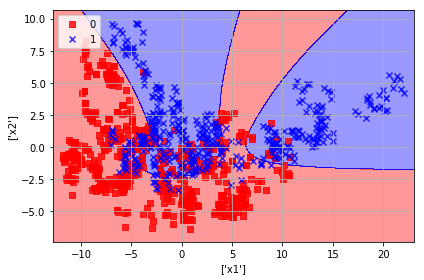

In [34]:
mlp_Dataset1_fit = mlp_Dataset1.fit(X_train1_v1.values,y_train1.values)
plot_decision_regions(X_train1_v1.values, y_train1.values, classifier=mlp_Dataset1_fit)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
print('Banknotes dataset')
print('the weights are \n',mlp_Dataset1_fit.coefs_)
print('the bias \n ', mlp_Dataset1_fit.intercepts_)
print('number of iterations \n', mlp_Dataset1_fit.n_iter_)
print('output activation', mlp_Dataset1_fit.out_activation_)

Banknotes dataset
the weights are 
 [array([[-0.68611781,  0.1754116 ,  0.02676356, -0.59523437,  0.29945653,
         0.62897512,  0.98912151, -0.24418316,  0.69732851,  0.03391531],
       [ 0.34287521, -0.24790917, -0.58218199,  0.03564895,  1.60619696,
        -0.13843306,  0.83060041,  0.13968023,  0.70289238,  0.16996407]]), array([[ 0.03921283,  0.73813223, -0.92273016,  0.34981135,  0.30835019],
       [ 1.52756677,  0.84064293, -1.01807912,  0.21047898,  0.11798745],
       [-0.94953574,  0.01425274,  0.30960617, -0.90318397, -1.09464711],
       [ 1.3216421 ,  0.55494722, -0.64318362,  0.49257381, -0.12772129],
       [ 0.0383636 ,  0.43182418, -1.00464245, -0.77985492, -0.94632864],
       [-0.06836789, -0.0955499 ,  0.12175324, -0.97474908, -0.20055463],
       [-0.28409095,  0.63898731,  0.3428128 ,  0.71030615,  1.18774937],
       [-0.55953721, -0.30388904, -0.44395531, -1.17135444, -1.10503781],
       [ 0.17664806,  0.65735816, -0.39357685,  0.63863944,  0.24872095],
 

### MLP - Nursery dataset

In [36]:
mlp_Dataset2 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5), alpha=0.01, max_iter=5000)
mlp_Dataset2

MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
mlp_Dataset2_fit = mlp_Dataset2.fit(X_train2_v1.values,y_train2.values)
'''
plot_decision_regions(X_train2_v1.values, y_train2.values, classifier=mlp_Dataset2_fit)
plt.xlabel(['x1'])
plt.ylabel(['x2'])
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
'''

"\nplot_decision_regions(X_train2_v1.values, y_train2.values, classifier=mlp_Dataset2_fit)\nplt.xlabel(['x1'])\nplt.ylabel(['x2'])\nplt.legend(loc='upper left')\nplt.grid()\nplt.tight_layout()\nplt.show()\n"

In [38]:
print('Nursery dataset')
print('the weights are \n',mlp_Dataset2_fit.coefs_)
print('the bias \n ', mlp_Dataset2_fit.intercepts_)
print('number of iterations \n', mlp_Dataset2_fit.n_iter_)
print('output activation', mlp_Dataset2_fit.out_activation_)

Nursery dataset
the weights are 
 [array([[ 2.41468187e+00,  7.92792067e-02, -9.75920650e-01,
        -5.34672534e-02, -1.41726496e-01,  3.74547096e-01,
         1.28239959e-02,  2.25306101e-01,  8.34166898e-02,
         9.81848248e-03],
       [-9.53151162e-02, -5.54040292e-01, -1.89776746e-02,
         6.53566877e-02,  7.36535833e-01,  4.14765493e-02,
        -1.29832214e+00,  7.30221078e-02, -3.57545530e-02,
         6.53993546e-01],
       [-5.77971654e-02, -4.34862363e-02,  2.05010039e-03,
         2.53664476e-01,  6.02034650e-02,  9.86081224e-02,
        -3.08091357e-01, -5.05041528e-01, -1.82004910e-02,
         6.74898112e-02],
       [ 9.38108020e-01,  6.54437971e-01, -1.55939187e+00,
         1.48744611e+00,  2.94310874e-01, -1.61134229e+00,
         4.38256744e-01,  7.23721490e-01,  5.90663811e-01,
         2.68667818e-02],
       [ 1.22723280e-01, -2.16268546e-01, -6.86901513e-01,
        -4.74051621e-01, -3.34397948e-01, -7.62730086e-02,
        -1.93857534e-02, -1.1466934

### SVM - Banknotes dataset

In [39]:
from sklearn.svm import SVC

svm_Dataset1=SVC(C=1.0,kernel='rbf', tol=1e-05, verbose=0)
#svm_Dataset1=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)

svm_Dataset1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


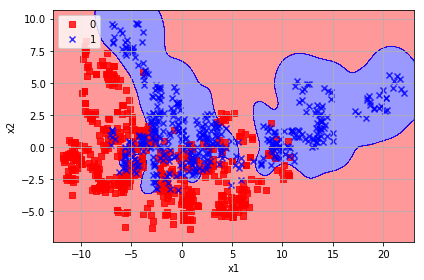

In [40]:
svm_Dataset1_fit = svm_Dataset1.fit(X_train1_v1.values, y_train1.values)

plot_decision_regions(X_train1_v1.values, y_train1.values, classifier=svm_Dataset1_fit)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
print('Banknotes dataset')
print('dual coef \n', svm_Dataset1_fit.dual_coef_)
print ('support vectors \n', svm_Dataset1_fit.support_vectors_)
print('index of support vectors \n ', svm_Dataset1_fit.support_)
print ('bias', svm_Dataset1_fit.intercept_)
print('the classifier \n', svm_Dataset1_fit)

Banknotes dataset
dual coef 
 [[-1.89583027e-01 -1.00000000e+00 -1.00000000e+00 -6.72138020e-01
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -4.11236689e-01 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -9.10942789e-01
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -3.50250476e-01 -2.36748864e-01 -1.00000000e+00 -6.55279507e-01
  -8.40355151e-01 -4.65208620e-01 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -6.05812014e-01 -1.95832694e-01 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -8.27546701e-01 -6.39606632e-01
  -1.00000000e+00 -1.00000000e+00 -5.29192201e-01 -1.00000000e+00
  -1.00000000e+00 -7.03917563e-01 -5.87628009e-01 -1.00000000e+00
  -1.00000000e+00 -5.85597253e-02 -1.86838833e-01 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -5.15492664e-01
  -1.00000000e+00 -6.44019545e-01 -1.00000000e+00 -6.28366757e-02
  -1.00000000e+00 -5.18240114e-01 -1.00000000e

### SVM - Nursery dataset

In [42]:
svm_Dataset2=SVC(C=1.0,kernel='rbf', tol=1e-05, verbose=0)
#svm_Dataset2=SVC(C=1.0,kernel='rbf', max_iter=2000, tol=1e-05, verbose=0)
svm_Dataset2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=2000, probability=False, random_state=None,
  shrinking=True, tol=1e-05, verbose=0)

In [43]:
svm_Dataset2_fit = svm_Dataset2.fit(X_train2_v1.values, y_train2.values)
#plot_decision_regions(X_train2_v1.values, y_train2.values, classifier=svm_Dataset2_fit)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.legend(loc='upper left')
#plt.grid()
#plt.tight_layout()
#plt.show()

/home/armando/.local/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [44]:
print('Nursery dataset')
print('dual coef \n', svm_Dataset2_fit.dual_coef_)
print ('support vectors \n', svm_Dataset2_fit.support_vectors_)
print('index of support vectors \n ', svm_Dataset2_fit.support_)
print ('bias', svm_Dataset2_fit.intercept_)
print('the classifier \n', svm_Dataset2_fit)

Nursery dataset
dual coef 
 [[ 0.36137265  0.32328027  0.         ... -0.         -0.
  -1.        ]
 [ 0.          0.01212757  0.         ... -1.         -1.
  -1.        ]
 [ 0.05283263  1.          0.2643288  ... -0.         -0.
  -0.        ]
 [ 0.          0.05596269  0.         ... -0.         -0.
  -1.        ]]
support vectors 
 [[-3.02069858e-02 -7.19415813e-01  1.97947068e+00 ...  6.66272581e-01
  -1.52949572e+00  3.70477776e-02]
 [-1.99922652e+00 -6.71020462e-01  1.96941780e+00 ...  1.88533282e+00
   6.78009256e-01 -4.01423505e-01]
 [ 9.97525921e-01 -7.21949659e-01  2.01016702e+00 ... -2.39060418e-01
   1.08396277e+00 -3.27397540e-02]
 ...
 [-2.83504352e-03 -6.76238693e-01 -2.15519814e-01 ... -1.51632745e+00
   2.24704822e-01  7.61752772e-01]
 [-7.25692700e-04 -1.10823486e+00 -1.11404026e+00 ... -1.52657833e+00
   2.36864286e-01  7.61579388e-01]
 [-2.41677835e-03  6.98744857e-01 -1.99059085e+00 ... -1.10232477e+00
  -1.08600705e+00  8.05021555e-01]]
index of support vectors 

# Task C - Evaluation

## Holdout

In [45]:
pca = PCA(n_components=2)
X_test1_pca = pca.fit_transform(X_test1)
print("Accuracy of ",mlp_Dataset1_fit.score(X_test1_pca,y_test1))

Accuracy of  0.8058252427184466


In [46]:
print("Accuracy of ",svm_Dataset1_fit.score(X_test1_pca,y_test1))

Accuracy of  0.8495145631067961


In [47]:
from sklearn.metrics import accuracy_score
# Código que encontrei online
y_pred = mlp_Dataset1_fit.predict(X_test1_pca)
print("MLP accuracy = ",accuracy_score(y_test1, y_pred))

y_pred = svm_Dataset1_fit.predict(X_test1_pca)
print("SVM accuracy = ",accuracy_score(y_test1, y_pred))

MLP accuracy =  0.8058252427184466
SVM accuracy =  0.8495145631067961


## CV Method

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X1)

X12 = scaler.transform(X1)

pca = PCA(n_components=2)
X_test1_pca = pca.fit_transform(X12)

print("Default scoring")
scores = cross_val_score(mlp_Dataset1, X_test1_pca, y1, cv=5)
print("MLP Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(svm_Dataset1, X_test1_pca, y1, cv=5)
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print("\nF1 Macro scoring")
scores = cross_val_score(mlp_Dataset1, X_test1_pca, y1, cv=5, scoring='f1_macro')
print("MLP Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(svm_Dataset1, X_test1_pca, y1, cv=5, scoring='f1_macro')
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Default scoring
MLP Accuracy: 0.83 (+/- 0.06)
SVM Accuracy: 0.82 (+/- 0.05)

F1 Macro scoring
MLP Accuracy: 0.83 (+/- 0.06)
SVM Accuracy: 0.81 (+/- 0.05)


Average difference of 0.001263 with std. dev. of 0.002194.


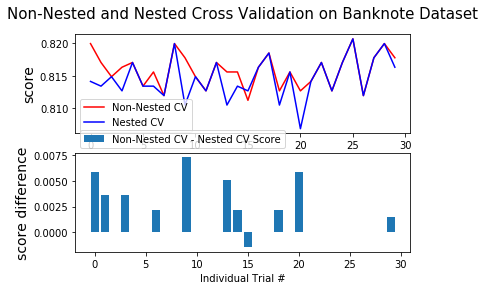

In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
X_iris = X_test1_pca
y_iris = y1

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = svm_Dataset1

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Banknote Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()